# Toyota Price Predictions: A Comprehensive Guide to Linear Regression, Regression Statistics, and Feature Importance Analysis

In [1]:
!pip install shap

# Step 1: Importing Libraries

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import shap  # Library for SHAP values

# Setting visualization styles
sns.set(style="whitegrid")

In [40]:
# Load the dataset from the provided URL
url = 'https://github.com/fenago/datasets/raw/refs/heads/main/Assignment%201%20-%20Toyota%20-%20Student%20Use.xlsx'
# toyota_df = pd.read_excel(url, sheet_name=0)
toyota_df = pd.read_excel(url, sheet_name=0, header=1)  # Use header=1 to set the second row as the header

# Display the first few rows of the dataset to understand its structure
toyota_df.head()

,Toyota Price,Age_08_04,Mfg_Month,KM,HP,Met_Color,Automatic,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,46986,90,1,0,0,0,0,1,0,0,0,0
1,13750,23,10,72937,90,1,0,0,0,0,1,0,0,0,0
2,13950,24,9,41711,90,1,0,0,0,0,1,0,0,0,0
3,14950,26,7,48000,90,0,0,0,0,0,1,0,0,0,0
4,13750,30,3,38500,90,0,0,0,1,0,1,0,0,0,0


# Step 2: Loading and Preprocessing the Dataset

In [41]:
toyota_df.columns

Index(['Toyota Price', 'Age_08_04', 'Mfg_Month', 'KM', 'HP', 'Met_Color',
       'Automatic', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider',
       'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [ ]:
# Set the first row as the header and clean the data
toyota_df.columns = toyota_df.iloc[0]
toyota_df = toyota_df[1:]

In [42]:
# Convert necessary columns to numeric types and drop any missing values
toyota_df = toyota_df.apply(pd.to_numeric, errors='coerce')
toyota_df = toyota_df.dropna()  # Drop rows with missing values

# Select features for prediction (all columns except 'Toyota Price')
features = toyota_df.columns.difference(['Toyota Price'])
X = toyota_df[features]
y = toyota_df['Toyota Price']

# Display cleaned data
toyota_df.head()

,Toyota Price,Age_08_04,Mfg_Month,KM,HP,Met_Color,Automatic,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,46986,90,1,0,0,0,0,1,0,0,0,0
1,13750,23,10,72937,90,1,0,0,0,0,1,0,0,0,0
2,13950,24,9,41711,90,1,0,0,0,0,1,0,0,0,0
3,14950,26,7,48000,90,0,0,0,0,0,1,0,0,0,0
4,13750,30,3,38500,90,0,0,0,1,0,1,0,0,0,0


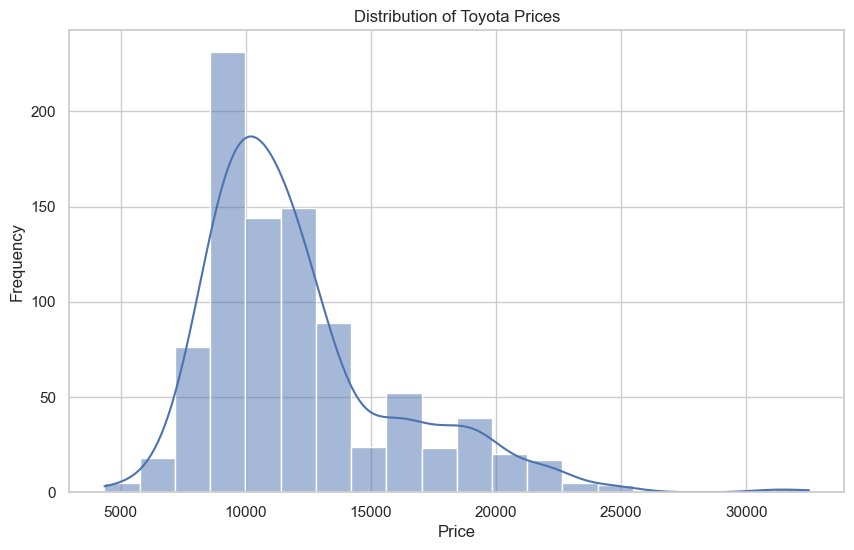

In [43]:
# Visualize the distribution of Toyota Price
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of Toyota Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Step 3: Exploratory Data Analysis (EDA)

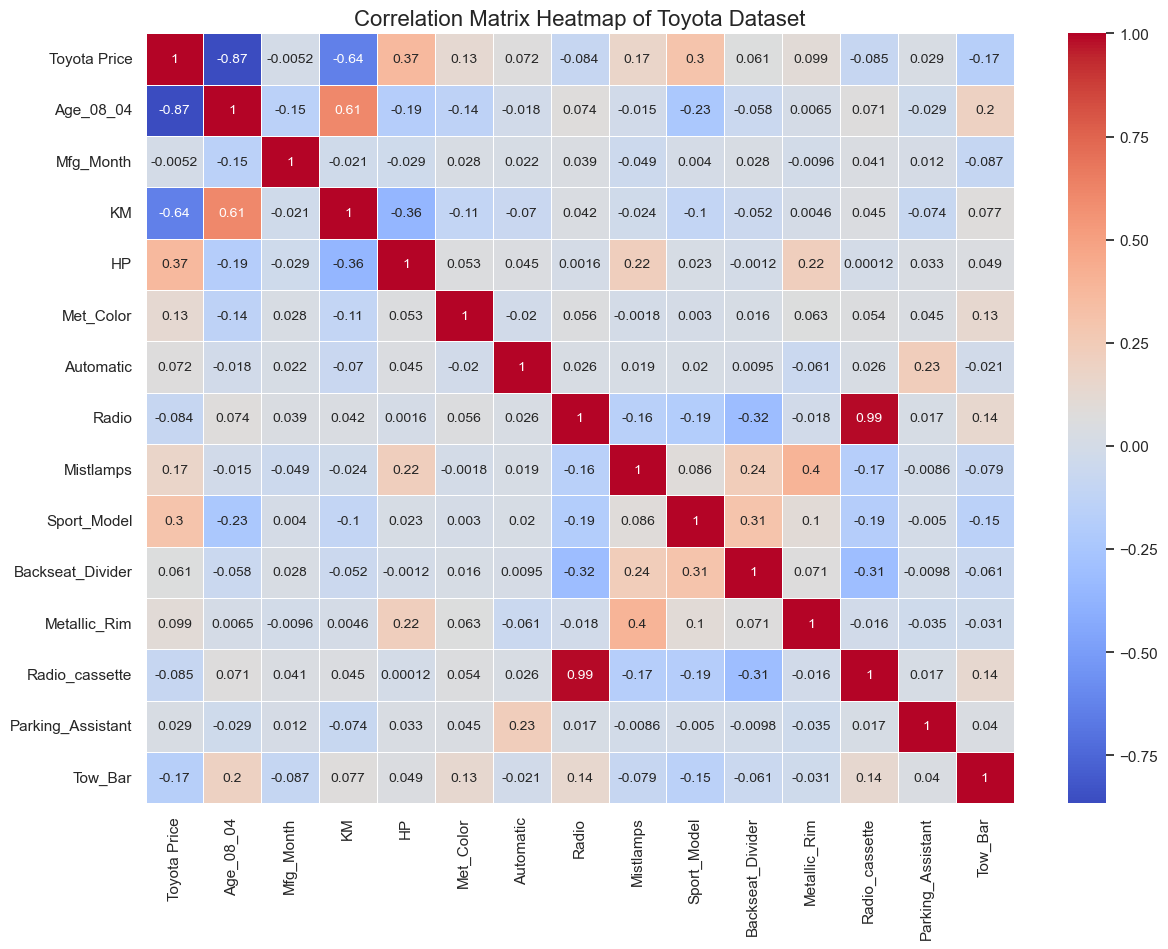

In [44]:
# Generate a clearer heatmap for the correlation matrix
correlation_matrix = toyota_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap of Toyota Dataset", fontsize=16)
plt.show()

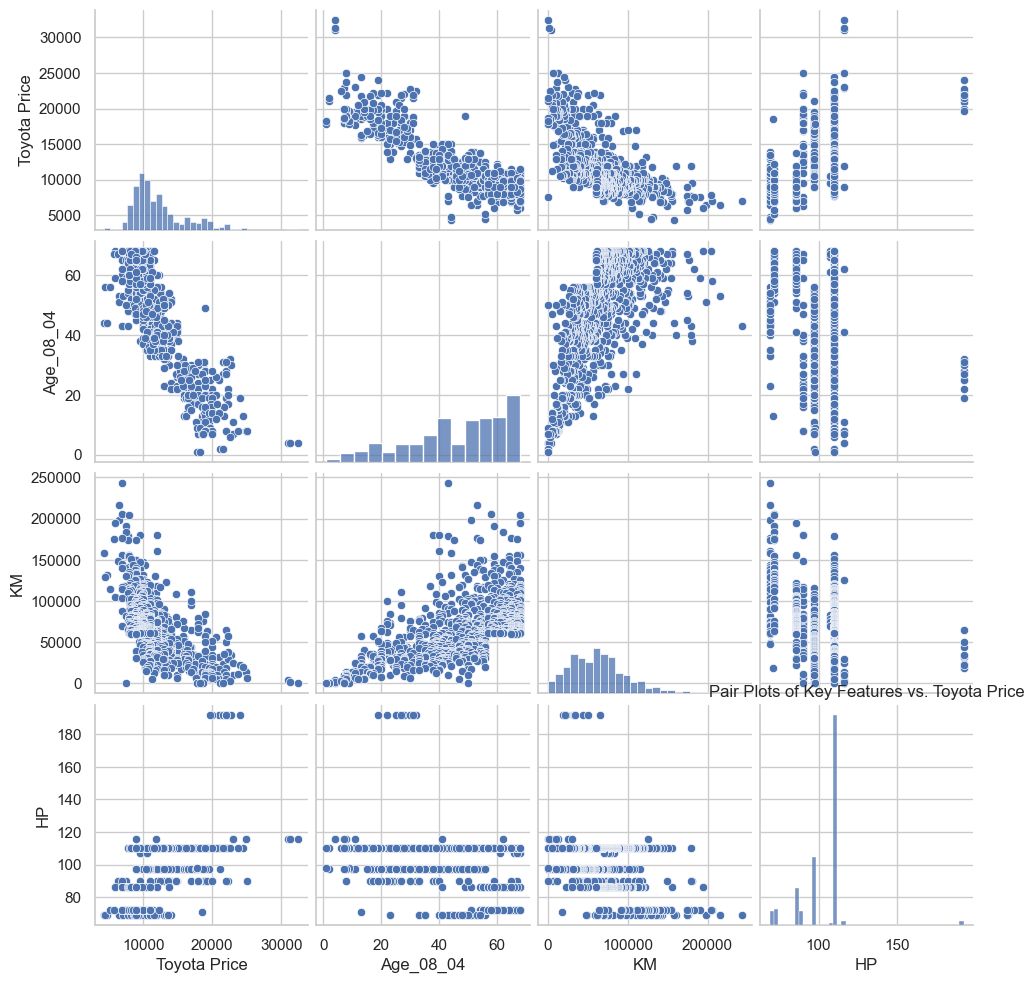

In [45]:
# Generate pair plots for selected features
sns.pairplot(toyota_df, vars=['Toyota Price', 'Age_08_04', 'KM', 'HP'])
plt.title("Pair Plots of Key Features vs. Toyota Price")
plt.show()

# Step 4: Building and Training the Linear Regression Model

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test data
y_pred = model.predict(X_test)

## Model Output Summary:

In [47]:
# Add a constant to the model for the intercept
X_train_sm = sm.add_constant(X_train)

# Create the OLS model and fit it
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           Toyota Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     273.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          9.17e-253
Time:                        11:45:15   Log-Likelihood:                -5482.6
No. Observations:                 629   AIC:                         1.100e+04
Df Residuals:                     614   BIC:                         1.106e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.784e+04    534.92

C:\Users\sudwa\AppData\Local\Temp\ipykernel_10796\2951013332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Source of Variation', y='Sum of Squares', data=anova_df, palette='coolwarm')


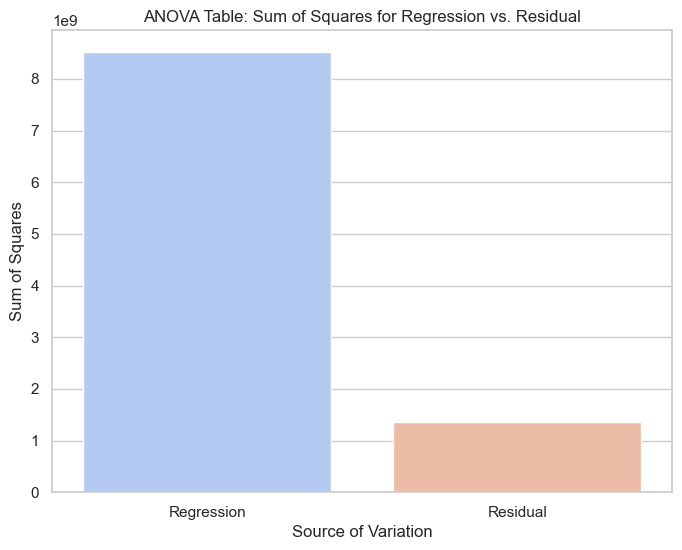

In [48]:
# Plot the ANOVA table
anova_data = {'Source of Variation': ['Regression', 'Residual'],
              'Sum of Squares': [8.516e+09, 1.366e+09]}

anova_df = pd.DataFrame(anova_data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Source of Variation', y='Sum of Squares', data=anova_df, palette='coolwarm')
plt.title('ANOVA Table: Sum of Squares for Regression vs. Residual')
plt.ylabel('Sum of Squares')
plt.show()

# Step 7: Feature Importance Analysis

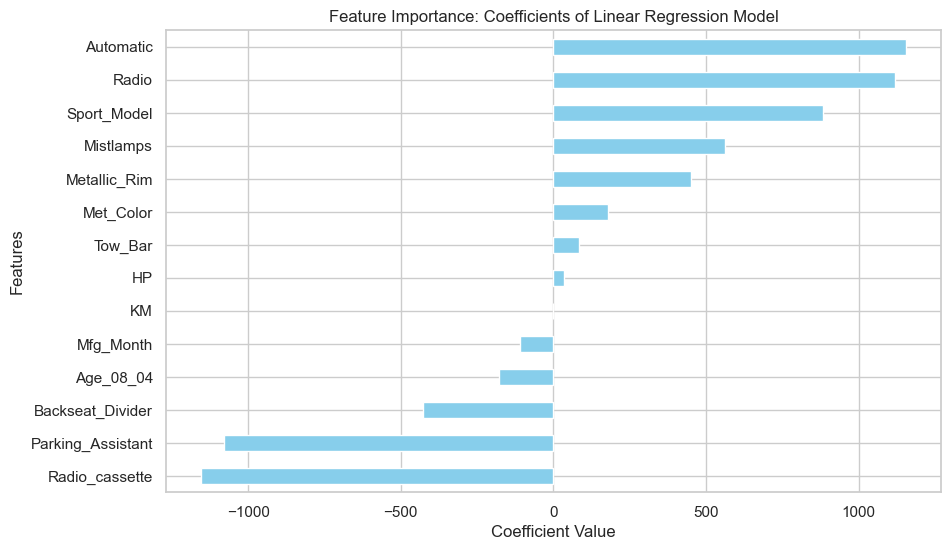

In [49]:
# Create a weight plot for feature coefficients
coefficients = pd.Series(model_sm.params[1:], index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance: Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

PermutationExplainer explainer: 630it [01:17,  8.09it/s]                                                               


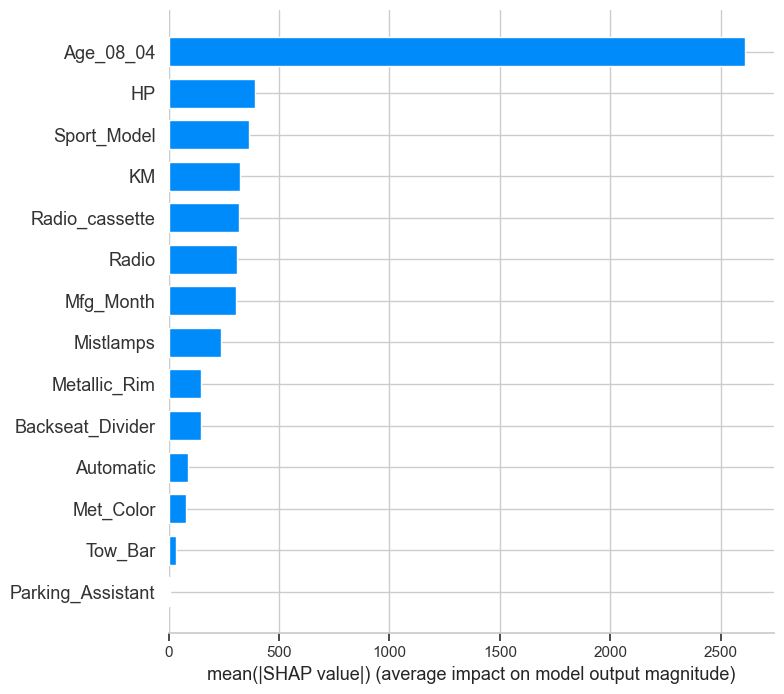

In [50]:
# Install SHAP if necessary
# !pip install shap

import shap
# Use SHAP to visualize feature effects
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

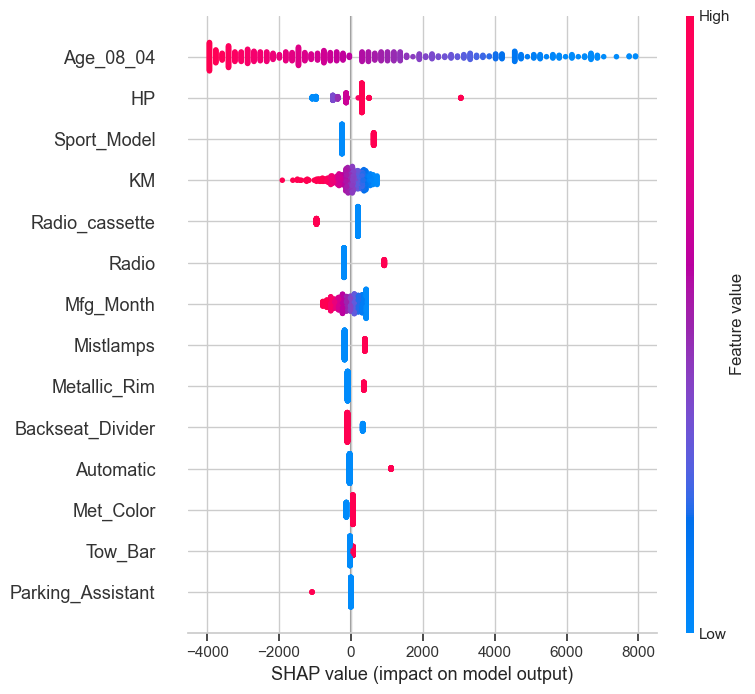

In [51]:
# SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="dot")

In [52]:
from sklearn.feature_selection import RFE

# Use RFE to select top features
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Print ranking of features
print("Feature ranking:", selector.ranking_)

Feature ranking: [ 7  1  2  9 10  1  3  8  1  4  6  5  1  1]


C:\Users\sudwa\AppData\Local\Temp\ipykernel_10796\1857947206.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')


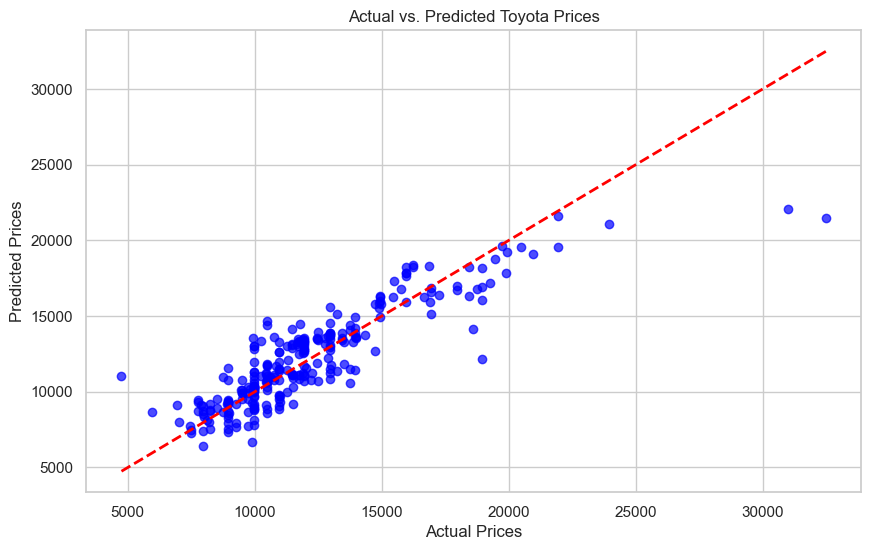

In [53]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')
plt.title('Actual vs. Predicted Toyota Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()